# Single-Layer feedforward network

We code a very simple 1-layer network to learn a step function 
$$
f(x)=\begin{cases}
1, & -30\le x<-10,\\
0.5, & -10\le x<10,\\
0, & 10\le x\le30.
\end{cases}
$$

This kind of function is often encountered in (partial) differential equations, where it represents some medium property that varies abruptly over a spatial, or temporal variable.

In a previous example, we learned a sine function from noisy measurements. Here we do not add any noise.

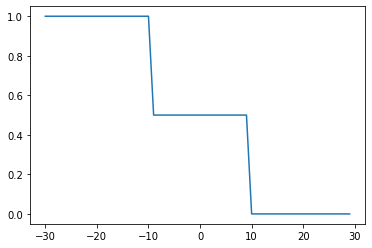

In [1]:
import torch
import matplotlib.pyplot as plt
 
# generate (synthetic) data
X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] <= -10)] = 1.0
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 0.5
Y[(X[:, 0] > 10)] = 0
# plot f(x)
plt.plot(X, Y)
plt.show()

## Build the network

This neural network features 
- an input layer, 
- a hidden layer with two neurons, 
- and an output layer. 

After each layer, a sigmoid activation function is applied. 

In [2]:
# Define the class for single layer NN
class one_layer_net(torch.nn.Module):    
    # Constructor
    def __init__(self, input_size, hidden_neurons, output_size):
        super(one_layer_net, self).__init__()
        # hidden layer 
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size) 
        # defining layers as attributes
        self.layer_in = None
        self.act = None
        self.layer_out = None
    # prediction function
    def forward(self, x):
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred

Instantiate the model class to create a model object

In [3]:
# create the model 
model = one_layer_net(1, 2, 1)  # 2 represents two neurons in one hidden layer

Instantiate the loss class, and the optimizer class

- loss = cross-entropy
- optimizer = standard SGD

In [4]:
def criterion(y_pred, y):
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Train the model, looping over epochs, compute loss, and plot result every 1000 iterations.

1000 epochs done!


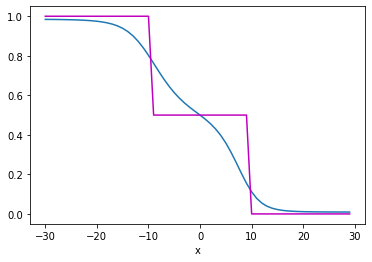

2000 epochs done!


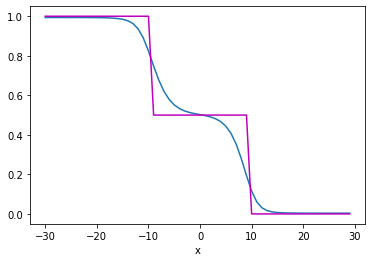

3000 epochs done!


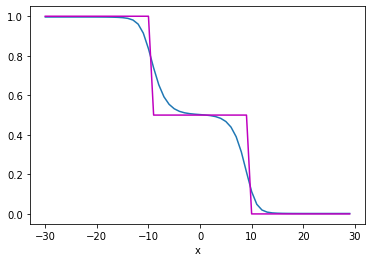

4000 epochs done!


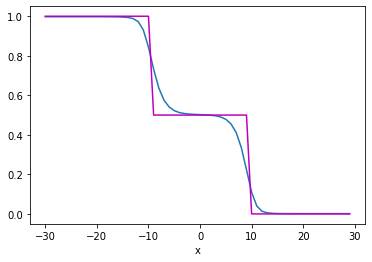

5000 epochs done!


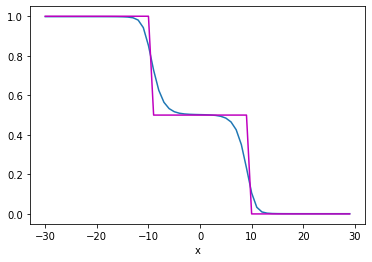

In [5]:
# Define the training loop
epochs=5000
cost = []
total=0
for epoch in range(epochs):
    total=0
    epoch = epoch + 1
    for x, y in zip(X, Y):
        yhat = model(x)
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # get total loss 
        total+=loss.item() 
    cost.append(total)
    if epoch % 1000 == 0:
        print(str(epoch)+ " " + "epochs done!") # visualze results after every 1000 epochs   
        # plot the result of function approximator
        plt.plot(X.numpy(), model(X).detach().numpy())
        plt.plot(X.numpy(), Y.numpy(), 'm')
        plt.xlabel('x')
        plt.show()

Finally, plot the loss function over the iterations/epochs

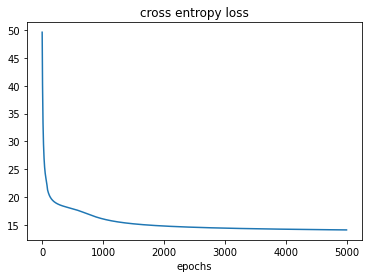

In [6]:
# plot the cost
plt.plot(cost)
plt.xlabel('epochs')
plt.title('cross entropy loss')
plt.show()

## Things to try as exercises

1. Change the activation function.
2. Use MSE, or MAE loss.
3. Change the network architecture - use more neurons, more layers (overfitting...).
4. Modify the optimisation parameters (lr), or the optimization method.